In [ ]:
#Imports needed
from sklearn import metrics
#Data Manipulation
import pandas as pd
import numpy as np
import time


from sklearn import metrics
#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Train Test Split
from sklearn.model_selection import train_test_split


from sklearn.metrics import accuracy_score

from joblib import parallel_backend

#Scaling
from sklearn.preprocessing import MinMaxScaler

#Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

#Evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

#File Directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
# Reading csv file
df = pd.read_csv('/content/sample_data/SA_Aqar.csv')

# **EDA (Exploratory Data Analysis)**

In [ ]:
#Sorting values
df.sort_values(by='price',ascending=False).head(5)

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details
1206,جدة,حي الروضة,شمال,2500,0,5,5,5,1,1,...,1,0,1,1,0,1,1,0,1700000,العقار فيه مميزات كثير له وله تراخيص جاهزه مجه...
1168,جدة,حي الحمدانية,3 شوارع,300,0,5,5,3,1,1,...,1,0,1,1,0,1,1,1,1300000,فيلا فاخرة حي الحمدانيه\nمكونات المشروع دورين ...
1974,الدمام,حي ضاحية الملك فهد,شمال,250,0,5,5,1,1,1,...,1,0,1,0,0,1,0,0,800000,دبلوكس في الضاحيه مكون من 3ادوار ارضي مجالس ال...
417,الرياض,حي طويق,شرق,400,32,5,3,1,1,1,...,0,0,1,0,0,0,0,0,800000,فيلا دور دور مساحه ٤٠٠ متر على شارعين شرقيه وش...
950,الرياض,حي الاسكان,غرب,250,0,3,3,2,1,1,...,0,0,1,0,1,1,0,1,800000,دبلكسات متلاصقة\nمساحات من ٢٤٥ الى ٢٥٠ م \nشار...


In [ ]:
#Describe the data
df.describe()

,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,driver_room,maid_room,furnished,ac,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price
count,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3.718000e+03
mean,390.968531,5.064820,5.083916,4.606509,2.243948,0.909360,0.802044,0.495697,0.795320,0.123453,0.560785,0.521517,0.162453,0.802582,0.034158,0.499462,0.814416,0.080958,0.181280,8.738797e+04
std,1565.056135,7.590427,1.230040,0.703449,0.916436,0.287135,0.398512,0.500049,0.403522,0.329001,0.496358,0.499604,0.368915,0.398104,0.181660,0.500067,0.388823,0.272807,0.385302,7.063470e+04
min,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+03
25%,280.000000,0.000000,4.000000,4.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.500000e+04
50%,330.000000,2.000000,5.000000,5.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,7.000000e+04
75%,400.000000,7.000000,6.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000e+05
max,95000.000000,36.000000,7.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.700000e+06


In [ ]:
#Check null values
df.isna().sum()

city             0
district         0
front            0
size             0
property_age     0
bedrooms         0
bathrooms        0
livingrooms      0
kitchen          0
garage           0
driver_room      0
maid_room        0
furnished        0
ac               0
roof             0
pool             0
frontyard        0
basement         0
duplex           0
stairs           0
elevator         0
fireplace        0
price            0
details         80
dtype: int64

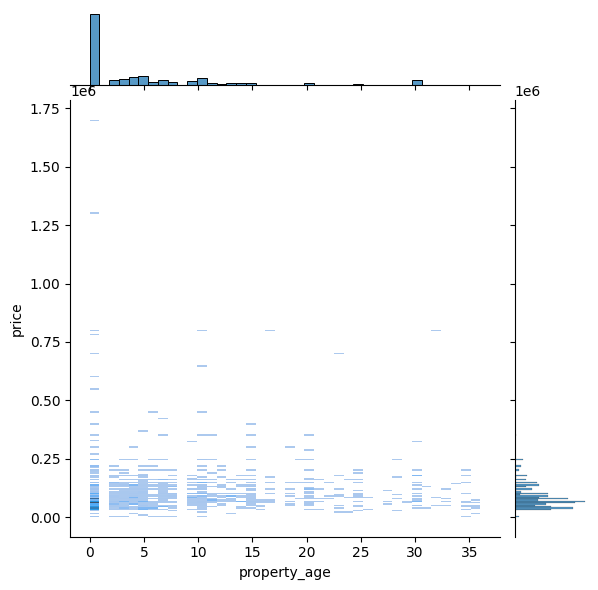

In [ ]:
#Jointplot comparing property age and the price of rental with kind histogram
sns.jointplot(x='property_age',y='price',data=df,kind='hist')

<ipython-input-36-b4f60c9aac54>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

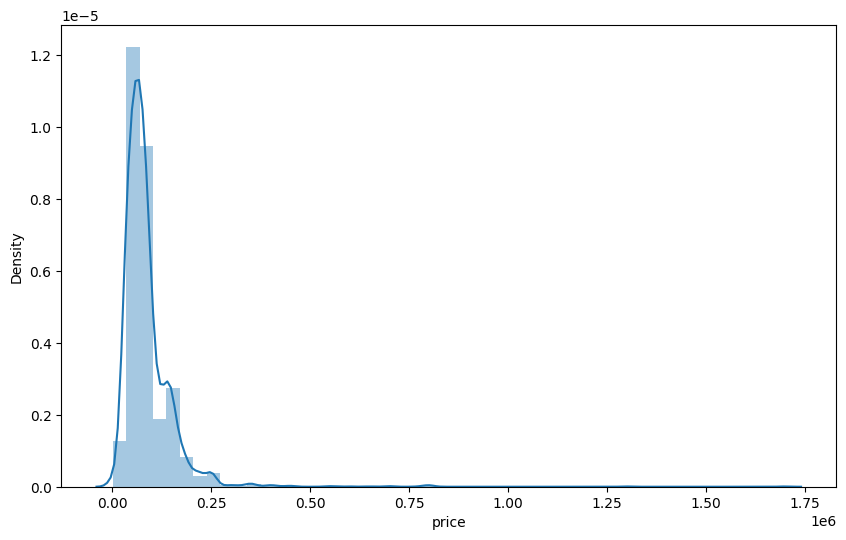

In [ ]:
#distplot for the price
plt.figure(figsize=(10,6))
sns.distplot(df['price'])

<ipython-input-37-9fddfaf4df9a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['bedrooms'],palette='Blues')


<Axes: ylabel='count'>

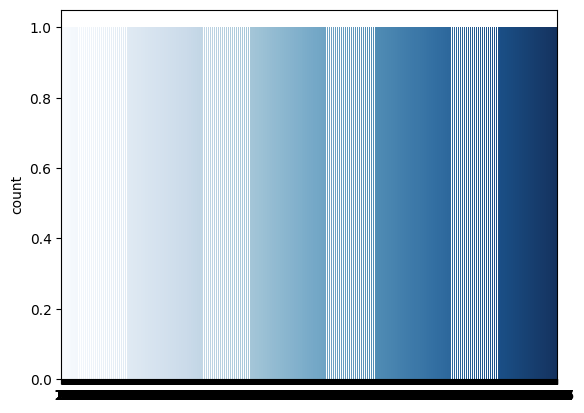

In [ ]:
#Countplot for the number of bedrooms
sns.countplot(df['bedrooms'],palette='Blues')

<ipython-input-38-4bf6721c0d21>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['bathrooms'],palette='Blues')


<Axes: ylabel='count'>

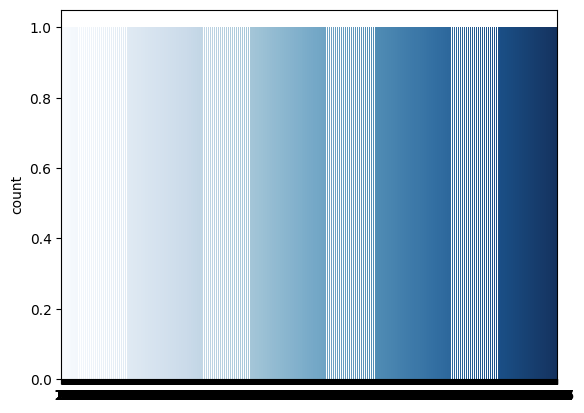

In [ ]:
#Countplot for the number of bathrooms
sns.countplot(df['bathrooms'],palette='Blues')

<Axes: xlabel='price', ylabel='size'>

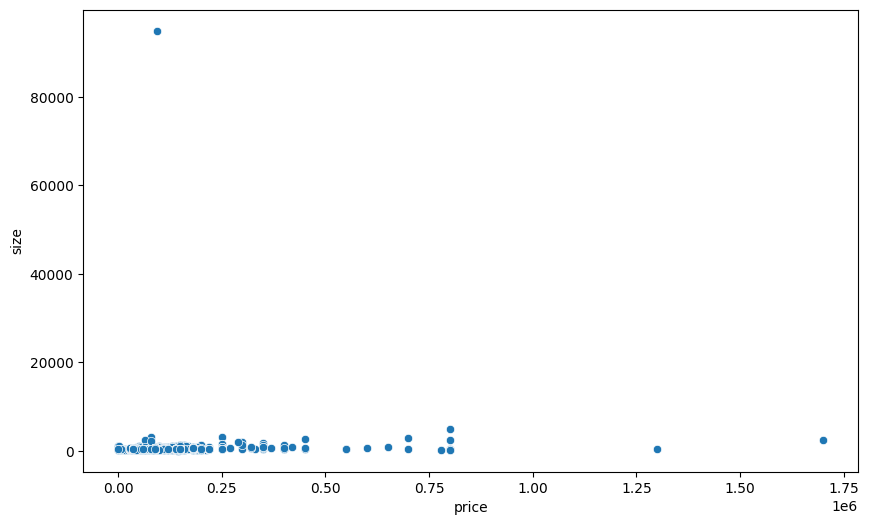

In [ ]:
#Scatterplot for the price vs size
plt.figure(figsize=(10,6))
sns.scatterplot(x='price',y='size',data=df)

<Axes: xlabel='bedrooms', ylabel='price'>

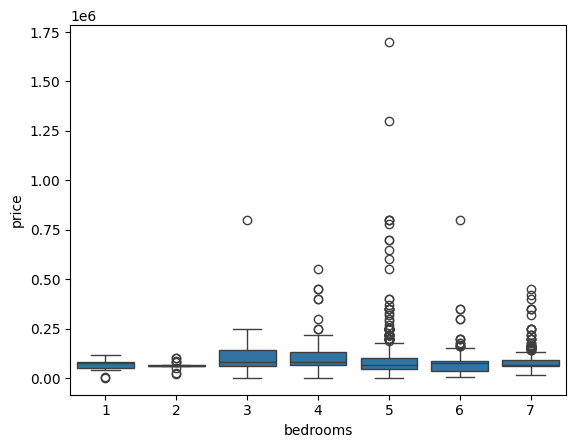

In [ ]:
#Boxplot comparing number of bedrooms with rental price
sns.boxplot(x='bedrooms',y='price',data=df)

<Figure size 1000x600 with 0 Axes>

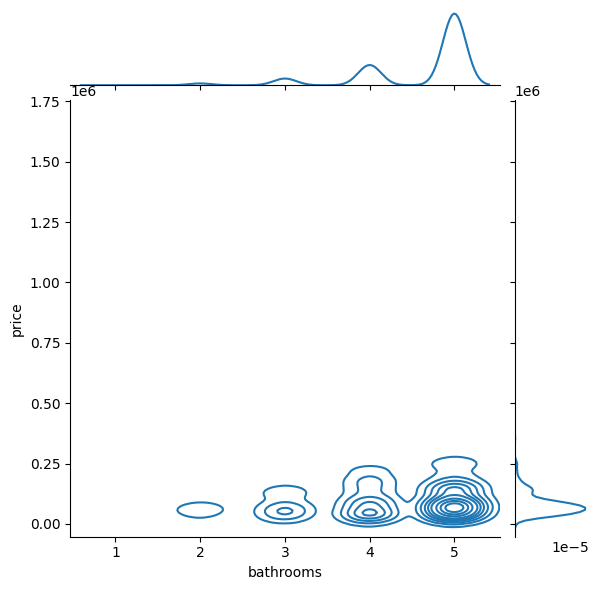

In [ ]:
#Jointplot comparing bathrooms and price of rental with kernal density estimation
plt.figure(figsize=(10,6))
sns.jointplot(x='bathrooms',y='price',data=df,kind='kde')

# **Data Cleaning**

In [ ]:
#Dropping outliers
df = df[df['price'] < 300000]
df = df[df['size'] < 1600]

In [ ]:
#One hot encoding
ct = pd.get_dummies(df['city'])
ds = pd.get_dummies(df['district'])
fr = pd.get_dummies(df['front'])

In [ ]:
df = pd.concat([df,ct,ds,fr],axis=1)

In [ ]:
df.drop(['city','district','front','details','3 شوارع','4 شوارع'],axis=1,inplace=True)

# **Train Test Split**

In [ ]:
X = df.drop(['price'],axis=1)
y = df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,train_size=0.8)

# **Scaling the data**

In [ ]:
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Training the model**

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(25, activation='selu'))
model.add(tf.keras.layers.Dense(50, activation='selu'))
model.add(tf.keras.layers.Dense(75, activation='selu'))
model.add(tf.keras.layers.Dense(100, activation='selu'))
model.add(tf.keras.layers.Dense(125, activation='selu'))
model.add(tf.keras.layers.Dense(150, activation='selu'))
model.add(tf.keras.layers.Dense(175, activation='selu'))
model.add(tf.keras.layers.Dense(200, activation='selu'))
model.add(tf.keras.layers.Dense(225, activation='selu'))
model.add(tf.keras.layers.Dense(250, activation='selu'))
model.add(tf.keras.layers.Dense(275, activation='selu'))
model.add(tf.keras.layers.Dense(300, activation='selu'))
model.add(tf.keras.layers.Dense(325, activation='selu'))
model.add(tf.keras.layers.Dense(350, activation='selu'))
model.add(tf.keras.layers.Dense(375, activation='selu'))

model.add(tf.keras.layers.Dense(1))

optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.01)
loss = tf.keras.losses.MeanAbsoluteError()

model.compile(optimizer=optimizer, loss=loss)

# **Training the model sequentially**

In [ ]:
start_time1 = time.time()
model.fit(X_train, y_train)
seq_time = time.time() - start_time1
print("Sequential time:", seq_time)

92/92 [==============================] - 3s 15ms/step - loss: 44296.2383
Sequential time: 4.724009990692139


In [ ]:
predictions = model.predict(X_test)

# Converting predictions to binary (0 or 1) for classification
binary_predictions = (predictions > 0.5).astype(int)
accuracy = metrics.r2_score(y_test, predictions)

print("Accuracy:", accuracy)

23/23 [==============================] - 0s 5ms/step
Accuracy: 0.11904775897663067


# **Training the model in parallel**

In [ ]:
start_time1 = time.time()
with parallel_backend('loky'):
  start_time1 = time.time()
  model.fit(X_train, y_train.values)
loky_time = time.time() - start_time1
print("Loky time:", loky_time)


92/92 [==============================] - 2s 13ms/step - loss: 22891.3438
Loky time: 2.31754994392395


In [ ]:
predictions = model.predict(X_test)
# Converting predictions to binary (0 or 1) for classification
binary_predictions = (predictions > 0.5).astype(int)
accuracy = metrics.r2_score(y_test, predictions)
speedup = seq_time / loky_time
efficiency_rate = loky_time / speedup

print("Speedup:", speedup)
print("Efficiency Rate:", efficiency_rate)
print("Accuracy:", accuracy)


23/23 [==============================] - 0s 4ms/step
Speedup: 2.0383638346510455
Efficiency Rate: 1.1369657882105721
Accuracy: 0.27147191618546407


In [ ]:
start_time1 = time.time()
with parallel_backend('threading', n_jobs=2):
  start_time1 = time.time()
  model.fit(X_train, y_train.values)
th_time = time.time() - start_time1
print("Threading time:", th_time)


92/92 [==============================] - 1s 12ms/step - loss: 18987.4590
Threading time: 1.2414946556091309


In [ ]:
predictions = model.predict(X_test)

# Converting predictions to binary (0 or 1) for classification
binary_predictions = (predictions > 0.5).astype(int)
accuracy = metrics.r2_score(y_test, predictions)
speedup = seq_time / th_time
efficiency_rate = th_time / speedup

print("Speedup:", speedup)
print("Efficiency Rate:", efficiency_rate)
print("Accuracy:", accuracy)


23/23 [==============================] - 0s 4ms/step
Speedup: 3.805098934054078
Efficiency Rate: 0.32627132096310607
Accuracy: 0.4670720024321544


In [ ]:
start_time1 = time.time()
with parallel_backend('multiprocessing'):
  start_time1 = time.time()
  model.fit(X_train, y_train.values)
mp_time = time.time() - start_time1
print("Multiprocessing time:", mp_time)


92/92 [==============================] - 1s 13ms/step - loss: 16416.0840
Multiprocessing time: 1.356759786605835


In [ ]:
predictions = model.predict(X_test)

# Converting predictions to binary (0 or 1) for classification
binary_predictions = (predictions > 0.5).astype(int)
accuracy = metrics.r2_score(y_test, predictions)
speedup = mp_time / loky_time
efficiency_rate = mp_time / speedup

print("Speedup:", speedup)
print("Efficiency Rate:", efficiency_rate)
print("Accuracy:", accuracy)

23/23 [==============================] - 0s 4ms/step
Speedup: 0.585428499680418
Efficiency Rate: 2.31754994392395
Accuracy: 0.6107714185300293


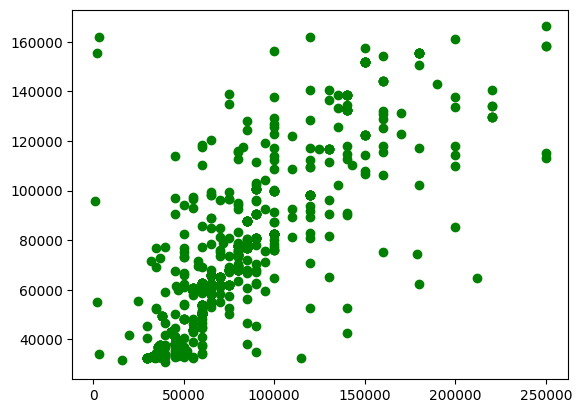

In [ ]:
# Scatter plot of predictions vs test data
plt.scatter(y_test,predictions,color='g')